# Google Play Store Review Analysis

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



pd.set_option('display.max_colwidth', None)

In [4]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'

df = pd.read_csv(url)

df.to_csv('../data/raw/PlayStoreDataset.csv')

In [5]:
df.sample(10)

,package_name,review,polarity
117,com.linkedin.android,app requires frequent login password why the hell this app everytime requires password to open...this is not expected from proffesional app like this...who the hell remembers password for each and every app or site?,0
710,com.opera.mini.native,"saved pages list should be in alphabetical order as well as in newest to oldest order.... dear opera mini, i hold back one star for not giving us a choice to view the saved pages list in alphabetical order as well as in newest to oldest order. please improve on that one thing and i would love to rate five stars to this beautiful browser opera mini.",0
406,com.facebook.orca,keeps losing connection ever since the update messenger has been losing connection and i don't get how if i'm connected to wifi and it's just been doing that ever since. and also i thought the chat bubble allows you to open the chat while on another application? well now ever since the recent update every time i open the chat bubble it exits me out the application i'm on. i don't know if it's a bug or something but please fix it.,0
564,jabanaki.todo.todoly,"unable to work with google & yahoo id sso notice that it still can't work with google / yahoo sso which is a big feature missing. it is a good initiative, but still some work to be done before the star... still thanks for the effort.",0
504,com.Slack,"now perfect, with animated gif support",1
291,com.tencent.mm,i cant find near by people around me. unable to load location data fix asap!,0
473,com.whatsapp,not working at all after updating..hangs phone nd freezes entirely... it takes too much time to open sometime... please resolve this as soon as possible,0
202,com.supercell.clashofclans,"your new update sucks it's now impossible to loot 2m in 4 hours. wtf. are you kidding me supercell? no more dead bases and spent 500k to find a semi dead base with 180k loot. dafuq u. ./,",0
857,com.rovio.angrybirds,"how to upgrade angry birds angry birds is really cool however if you were to upgrade it i would make more birds do different things, second make more challenges and be able to customise your own birds with armour and different powers then when you know what maps you have to destroy you can choose what bird will be best to use",1
3,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0


Dropeo la columna con identificadores


In [6]:
df.drop('package_name', inplace=True, axis=1)

In [7]:
df['review']= df["review"].str.strip().str.lower()

In [8]:
from funciones import get_unique_characters_count

lista_char = get_unique_characters_count(df)
np.array(lista_char)

array({' ': 37362, '!': 535, '#': 10, '$': 3, '%': 12, '&': 44, "'": 905, '(': 75, ')': 91, '*': 23, '+': 9, ',': 918, '-': 104, '.': 3229, '/': 65, '0': 93, '1': 149, '2': 107, '3': 60, '4': 63, '5': 126, '6': 37, '7': 13, '8': 21, '9': 16, ':': 67, ';': 20, '=': 3, '?': 232, '@': 1, '[': 4, ']': 4, '^': 2, '_': 2, 'a': 12376, 'b': 2687, 'c': 4166, 'd': 5696, 'e': 18657, 'f': 3098, 'g': 3864, 'h': 6505, 'i': 11676, 'j': 213, 'k': 1643, 'l': 6776, 'm': 4082, 'n': 10969, 'o': 13368, 'p': 4771, 'q': 98, 'r': 7807, 's': 10935, 't': 14923, 'u': 4709, 'v': 1988, 'w': 3435, 'x': 471, 'y': 3359, 'z': 181, '{': 1, '}': 1, '~': 1, '\x80': 28, '\x81': 17, '\x83': 2, '\x85': 18, '\x86': 9, '\x87': 36, '\x88': 21, '\x89': 9, '\x8a': 2, '\x8b': 53, '\x8c': 11, '\x8d': 70, '\x8f': 9, '\x90': 3, '\x91': 23, '\x92': 6, '\x94': 2, '\x95': 28, '\x96': 4, '\x97': 12, '\x98': 54, '\x99': 9, '\x9a': 5, '\x9b': 11, '\x9c': 8, '\x9d': 13, '\x9e': 1, '\x9f': 87, '\xa0': 8, '¤': 569, '§': 10, '¨': 41, '\xad': 

Con esto puedo ver que tengo caracteres que no pertenecen al ingles y emojis.

In [9]:
from funciones import clean_reviews_for_word_analysis

df_limpio = clean_reviews_for_word_analysis(df)
df_limpio_num = clean_reviews_for_word_analysis(df, keep_numbers=True)

In [10]:
lista_char2 = get_unique_characters_count(df_limpio)
np.array(lista_char2)

array({' ': 36104, 'a': 12376, 'b': 2687, 'c': 4166, 'd': 5696, 'e': 18657, 'f': 3098, 'g': 3864, 'h': 6505, 'i': 11676, 'j': 213, 'k': 1643, 'l': 6776, 'm': 4082, 'n': 10969, 'o': 13368, 'p': 4771, 'q': 98, 'r': 7807, 's': 10935, 't': 14923, 'u': 4709, 'v': 1988, 'w': 3435, 'x': 471, 'y': 3359, 'z': 181},
      dtype=object)

Con esto ya he conseguido limpiar todos los caracteres que podrian añadir ruido a mi modelo. El siguiente paso sera dividirlo en Train/Test



In [11]:
x = df_limpio['review']
y = df_limpio['polarity']

X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=42)


x_num = df_limpio_num['review']
y_num = df_limpio_num['polarity']

X_train_num, X_test_num, y_train_num, y_test_num =  train_test_split(x_num, y_num, test_size=0.2, random_state=42)

Ahora lo convertire en tokens mediante vectorizacion

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words

stop_words = get_stop_words(language='en')

vec_model = CountVectorizer(stop_words=stop_words)
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

vec_model_num = CountVectorizer(stop_words=stop_words)
X_train_num = vec_model_num.fit_transform(X_train_num).toarray()
X_test_num = vec_model_num.transform(X_test_num).toarray()

C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


### Entrenamiento dataset sin numeros

In [13]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7932960893854749

### Entrenamiento dataset numeros


In [16]:
model_num = MultinomialNB()
model_num.fit(X_train_num, y_train_num)

y_pred_num = model_num.predict(X_test_num)

accuracy_score(y_test_num, y_pred_num)

0.7932960893854749

Voy a escoger este dataset con numeros, pese a que me da peores resultados que el sin limpiar, el margen es muy pequeño.

Viendo además, que estos caracteres que he eliminado, no deberían aparecer en casos reales, este modelo probablemente sea más preciso en casos reales.

In [17]:
model_Gauss = GaussianNB()
model_Gauss.fit(X_train_num, y_train_num)
y_pred_Gauss = model_Gauss.predict(X_test_num)

print(accuracy_score(y_test_num, y_pred_Gauss))

0.7932960893854749


In [18]:
model_BernoulliNB = BernoulliNB()
model_BernoulliNB.fit(X_train_num, y_train_num)
y_pred_BernoulliNB = model_BernoulliNB.predict(X_test_num)

print(accuracy_score(y_test_num, y_pred_BernoulliNB))

0.7597765363128491


El modelo gausiano y el Multinomial me dan los mismos resultados, optimizare primero el Multinomial para ver que resultados puedo obtener

In [19]:
param_grid_binomial = {
    'alpha': [1e-10, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Suavizado de Laplace: muy bajo a alto
    'fit_prior': [True, False],                            # Aprender prob. a priori o asumir iguales
}

In [20]:
from sklearn.model_selection import GridSearchCV

grid_multinomial = GridSearchCV(model_num, param_grid_binomial, scoring='accuracy', cv = 5)

grid_multinomial.fit(X_train_num, y_train_num)

model_opti_multi = MultinomialNB(**grid_multinomial.best_params_)
model_opti_multi.fit(X_train_num, y_train_num)
y_pred = model_opti_multi.predict(X_test_num)

print('La accuracy del modelo multinomial optimizado es de: ', accuracy_score(y_test_num, y_pred))

La accuracy del modelo multinomial optimizado es de:  0.8100558659217877


In [21]:
param_grid_gauss = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
    'priors': [None]  # Si conoces las proporciones de cada clase, podrías incluir arrays, por ejemplo: [None, [0.5, 0.5]]
}

In [22]:
grid_gaussian = GridSearchCV(model_Gauss, param_grid_gauss, scoring='accuracy', cv = 5)

grid_gaussian.fit(X_train_num, y_train_num)

model_opti_gaussian = GaussianNB(**grid_gaussian.best_params_)
model_opti_gaussian.fit(X_train_num, y_train_num)
y_pred = model_opti_gaussian.predict(X_test_num)

print('La accuracy del modelo gaussiano optimizado es de: ', accuracy_score(y_test_num, y_pred))

La accuracy del modelo gaussiano optimizado es de:  0.7932960893854749


Mi mejor modelo es el Binomial optimizado.

In [23]:
from pickle import dump

dump(model_opti_multi, open("../models/naive_bayes_Binomial_optimized.sav", "wb"))

## Extra - Cloud Word

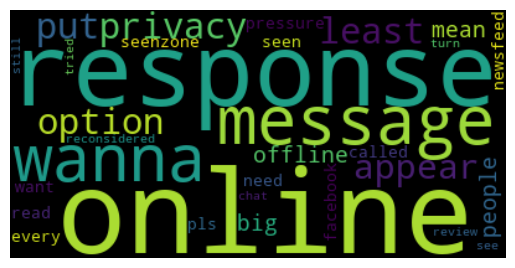

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Start with one review:
text = df.review[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()